# 

eix = cos x + isin x,

$e^{ix} = \cos x + i\sin x$.

So that means that $sin x = \frac{e^{ix} - e^{-ix}}{2i}$ and
$cos x = \frac{e^{ix} + e^{-ix}}{2}$.

Of course $\frac{1}{i} = -i$, because
$\frac{1}{i} \times \frac{i}{i} = \frac{i}{i^2} = \frac{i}{-1} = -i$.

So that means that
$sin x = \frac{e^{ix} - e^{-ix}}{2i} = \frac{i}{2}\left(e^{ix} - e^{-ix}\right)$.
And
$cos x = \frac{e^{ix} + e^{-ix}}{2} = \frac{1}{2}\left(e^{ix} + e^{-ix}\right)$.

We can retrieve the sin and cos functions by measuring $e^{ix}$ and
$e^{-ix}/2$.

Now, if we are doing the DFT, we only need to evaluate the $e^{ix}$ and
$e^{-ix}$ terms at specific values of $x$. Specifically we want to
evaluate $e^{i2\pi k n/N}$ and $e^{-i2\pi k n/N}$ for
$k = 0, 1, 2, \ldots, N-1$ and $n = 0, 1, 2, \ldots, N-1$. For example,
for N = 3, n=3, this would be $e^{i2\pi 0 n/3}=e^0=1$, $e^{i2\pi}=0$,
and $e^{i2\pi 2}=1$. For N = 3, n = 2, this becomes
$e^{i2\pi 0 n/3}=e^0=1$, $e^{i2\pi n/3}=e^{i2\pi/3}=-1/2 + i\sqrt{3}/2$,
and $e^{i2\pi 2n/3}=e^{i4\pi/3}=-1/2 - i\sqrt{3}/2$.

For N = 4, this would be $e^{i2\pi 0 n/4}=e^0=1$, $e^{i2\pi n/4}=i$,
$e^{i2\pi 2n/4}=-1$, and $e^{i2\pi 3n/4}=-i$.

## *Steps*

1.  Recap of the Fourier series per Strang

# *The Fourier Series*

## 

The Fourier series of a function is an expansion into sines and cosines:

$$
f(x)=a_{0}+a_{1} \cos x+b_{1} \sin x+a_{2} \cos 2 x+b_{2} \sin 2 x+\cdots
$$

. . .

How do we find the coefficients
$a_{0}, a_{1}, b_{1}, a_{2}, b_{2}, \ldots$?

. . .

We use **orthogonality**. The functions
$\cos x, \cos 2 x, \cos 3 x, \ldots$ are orthogonal on $[0,2 \pi]$… Same
is true for the sines.

. . .

To compute a coefficient like $b_{1}$, multiply both sides by the
corresponding function $\sin x$ and integrate from 0 to $2 \pi$. In
other words, *take the inner product* of both sides with $\sin x$ :

## 

$$
\int_{0}^{2 \pi} f(x) \sin x d x=a_{0} \int_{0}^{2 \pi} \sin x d x+a_{1} \int_{0}^{2 \pi} \cos x \sin x d x+b_{1} \int_{0}^{2 \pi}(\sin x)^{2} d x+\cdots
$$

$$
b_{1}=\frac{\int_{0}^{2 \pi} f(x) \sin x d x}{\int_{0}^{2 \pi}(\sin x)^{2} d x}=\frac{(f, \sin x)}{(\sin x, \sin x)}
$$

## *Analogy with projections*

The component of the vector $b$ along the line spanned by $a$ is
$b^{\mathrm{T}} a / a^{\mathrm{T}} a$.

. . .

A Fourier series is projecting $f(x)$ onto $\sin x$. Its component $p$
in this direction is exactly $b_{1} \sin x$.

## *Euler’s formula*

The complex exponential $e^{i x}$ is a combination of $\cos x$ and
$\sin x$:

$$
e^{i x}=\cos x+i \sin x
$$

. . .

So we can rewrite the Fourier series using complex exponentials:

$$
f(x)=c_{0}+c_{1} e^{i x}+c_{2} e^{2 i x}+\cdots = \sum_k c_k\cdot e^{i k x}
$$

. . . The coefficients $c_{0}, c_{1}, c_{2}, \ldots$ are related to the
$a$’s and $b$’s.

For example, $c_{1}=a_{1}-i b_{1}$.

. . .

The formula for finding the coefficients $c_{k}$ is the same as before,
but now we use the complex exponential functions $e^{i k x}$ instead of
the sines and cosines:

$$
c_{k}=\int_{0}^{2 \pi} f(x) e^{-i k x} d x
$$

# *Discrete Fourier Transform*

## *Discrete Fourier Series*

What if we have only a series of N discrete values
$y_{0}, y_{1}, y_{2}, \ldots$, instead of a continuous function $f(x)$?

. . .

First, we imagine that the values are periodic, with period N. So it’s
as if they are repeating beyond the N values we have.

. . .

Then we can identify a natural period $N$, and rewrite $x=2 \pi n / N$,
so the discrete Fourier series becomes

$$
\begin{align}
y[n] = \sum_k c[k]\cdot e^{i 2\pi k \frac{n}{N}}
\end{align}
$$

. . .

In matrix form, $\mathbf{y} = F \mathbf{c}$

where

$$
\begin{align}
\begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_{N-1} \end{bmatrix}
 = F c = \begin{bmatrix}
1 & 1 & 1 & \ldots & 1 \\
1 & e^{-i 2\pi/N} & e^{-i 4\pi/N} & \ldots & e^{-i 2\pi (N-1)/N} \\
1 & e^{-i 4\pi/N} & e^{-i 8\pi/N} & \ldots & e^{-i 4\pi (N-1)/N} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & e^{-i 2\pi(N-1)/N} & e^{-i 4\pi(N-1)/N} & \ldots & e^{-i 2\pi(N-1)(N-1)/N}
\end{bmatrix} \begin{bmatrix}c_0 \\ c_1 \\ c_2 \\ \vdots \\ c_{N-1}\end{bmatrix}
\end{align}
$$

## 

From Wikipedia, Original upload by en:User:Glogger, CC BY-SA 3.0
<http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons

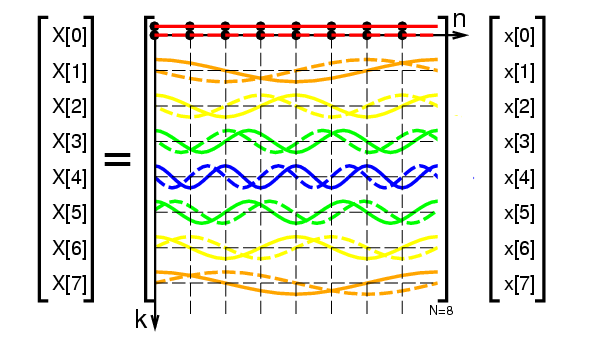

## *Finding the Fourier coefficients*

How can we find the Fourier coefficients?

These are a sequence of complex numbers $c_{0}, \ldots, c_{n-1}$, with
the same length $N$.

Two approaches:

. . .

By analogy with the continuous case,

$$
c_{k}=\int_{0}^{2 \pi} f(x) e^{-i k x} d x
$$

We will replace the integral by a sum over the discrete values
$y_{0}, y_{1}, y_{2}, \ldots$.

$$
c[k]= \frac{1}{N} \sum_{n=0}^{N-1} y[n] e^{-i 2 \pi k n / N}, \quad \text{for } k=0,1,2, \ldots, N-1
$$

This defines a matrix $F^\prime$ given as

$$
F^\prime = \frac{1}{N}\begin{bmatrix}
1 & 1 & 1 & \ldots & 1 \\
1 & e^{i 2\pi/N} & e^{i 4\pi/N} & \ldots & e^{i 2\pi (N-1)/N} \\
1 & e^{i 4\pi/N} & e^{i 8\pi/N} & \ldots & e^{i 4\pi (N-1)/N} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & e^{i 2\pi(N-1)/N} & e^{i 4\pi(N-1)/N} & \ldots & e^{i 2\pi(N-1)(N-1)/N}
\end{bmatrix}
$$

Note: this is $\frac{1}{N}$ times the complex conjugate of the matrix
$F$: $F^\prime = \frac{1}{N} F^*$.

## *Inverse DFT*

We have just shown two things:

1.  The DFT can be written as a matrix-vector product
    $\mathbf{y} = F \mathbf{c}$.

2.  The coefficients $\mathbf{c}$ can be found by
    $\mathbf{c} = F^\prime \mathbf{y}$.

3.  But of course it is also true from 1 that if $F$ is invertible, that
    $\mathbf{c} = F^{-1} \mathbf{y}$. Therefore,
    $F^{-1} = F^\prime=\frac{1}{N} F^*$.

4.  This means that $F$ is **unitary**. Its rows and columns are
    orthogonal.

## *A concrete example*

Let’s take an example with $N=4$ and $y=(2, 4, 6, 8)$.

. . .

We want to find coefficients $c_0, c_1, c_2, c_3$ such that our Fourier
series correctly reproduces the input values at each of the four points.

. . .

(We can’t find more than 4 coefficients because we only have 4 points of
data.)

. . .

$$
\begin{align}
y[n] = \sum_k c[k]\cdot e^{i 2\pi k \frac{n}{N}}
\end{align}
$$

. . .

$$
\begin{aligned}
c_{0}+c_{1} e^{i x}+c_{2} e^{2 i x}+c_{3} e^{3 i x}=\left\{\begin{array}{lll}
2 & \text { at } & x=0 \\
4 & \text { at } & x=\pi / 2 \\
6 & \text { at } & x=\pi \\
8 & \text { at } & x=3 \pi / 2
\end{array}\right)
\end{aligned}
$$

. . .

Make a table. Note that $i^2 = i^6 = -1$, $i^3 = i^7 = -i$, and
$i^4 = 1$.

For n = 0:

| k   | $i 2\pi k \times 0$ | $e^{i 2\pi k \times 0}$ |
|-----|---------------------|-------------------------|
| 0   | 0                   | 1                       |
| 1   | 0                   | 1                       |
| 2   | 0                   | 1                       |
| 3   | 0                   | 1                       |

. . .

For n = 1:

| k   | $i 2\pi k  \frac{1}{4}$ | $e^{i 2\pi k \frac{1}{4}}$ |
|-----|-------------------------|----------------------------|
| 0   | 0                       | 1                          |
| 1   | $i\pi/2$                | $i$                        |
| 2   | $i\pi$                  | $-1=i^2$                   |
| 3   | $3i\pi/2$               | $-i=i^3$                   |

## 

For n = 2:

| k   | $i 2\pi k  \frac{2}{4}$ | $e^{i 2\pi k \frac{2}{4}}$ |
|-----|-------------------------|----------------------------|
| 0   | 0                       | 1                          |
| 1   | $i\pi$                  | $-1=i^2$                   |
| 2   | $2i\pi$                 | $1=i^4$                    |
| 3   | $3i\pi$                 | $-1=i^6$                   |

. . .

For n = 3:

| k   | $i 2\pi k  \frac{3}{4}$ | $e^{i 2\pi k \frac{3}{4}}$ |
|-----|-------------------------|----------------------------|
| 0   | 0                       | 1                          |
| 1   | $3i\pi/2$               | $-i=i^3$                   |
| 2   | $3i\pi$                 | $-1 = i^6$                 |
| 3   | $9i\pi/2$               | $i = i^9$                  |

## *Solving for the coefficients*

Putting those all together,

$$
\begin{align*}
& c_{0}+c_{1}+c_{2}+c_{3}=2 \\
& c_{0}+i c_{1}+i^{2} c_{2}+i^{3} c_{3}=4 \\
& c_{0}+i^{2} c_{1}+i^{4} c_{2}+i^{6} c_{3}=6  \\
& c_{0}+i^{3} c_{1}+i^{6} c_{2}+i^{9} c_{3}=8
\end{align*}
$$

. . .

In other words, $F c = y$ for

$$
F=\left[\begin{array}{cccc}
1 & 1 & 1 & 1 \\
1 & i & i^{2} & i^{3} \\
1 & i^{2} & i^{4} & i^{6} \\
1 & i^{3} & i^{6} & i^{9}
\end{array}\right]
$$

## 

Check that $F F^\prime = I$:

$$\begin{aligned}
F F^\prime =\frac{1}{4}\left[\begin{array}{cccc}
1 & 1 & 1 & 1  \\
1 & i & i^{2} & i^{3} \\
1 & i^{2} & i^{4} & i^{6} \\
1 & i^{3} & i^{6} & i^{9}
\end{array}\right]\left[\begin{array}{cccc}
1 & 1 & 1 & 1 \\
1 & (-i) & (-i)^{2} & (-i)^{3} \\
1 & (-i)^{2} & (-i)^{4} & (-i)^{6} \\
1 & (-i)^{3} & (-i)^{6} & (-i)^{9}
\end{array}\right]=I
\end{aligned}
$$

## 

Check in Sympy:

In [1]:
from sympy import *
init_printing()

i = I
F = Matrix([[1, 1, 1, 1], [1, i, i**2, i**3], [1, i**2, i**4, i**6], [1, i**3, i**6, i**9]])

print("F:")
display(F)

Fp = 1/4 * F.conjugate()
print("F prime:")
display(Fp)

print("F F prime:")
display(F * Fp)

F:
F prime:
F F prime:

## *A simplification*

Notice that our matrix F had many terms which were exponents of $i$.

In general, we can simplify the matrix $F$ by defining
$w = e^{i 2\pi/N}$. This is the $N$th “primitive root of unity”, so that
$w^N = 1$.

. . .

For N = 4, $w = e^{i \pi/2} = i$.

. . .

Then we can write the Fourier equation as

$$
\left[\begin{array}{ccccc}
1 & 1 & 1 & \cdot & 1  \\
1 & w & w^{2} & \cdot & w^{n-1} \\
1 & w^{2} & w^{4} & \cdot & w^{2(n-1)} \\
\cdot & \cdot & \cdot & \cdot & \cdot \\
1 & w^{n-1} & w^{2(n-1)} & \cdot & w^{(n-1)^{2}}
\end{array}\right]\left[\begin{array}{c}
c_{0} \\
c_{1} \\
c_{2} \\
\cdot \\
c_{n-1}
\end{array}\right]=\left[\begin{array}{c}
y_{0} \\
y_{1} \\
y_{2} \\
\cdot \\
y_{n-1}
\end{array}\right], \quad w = e^{i 2\pi/n}
$$

## *Terminology*

We call the matrix $F$ the **DFT (Discrete Fourier Transform) matrix**.
It is a square unitary matrix of size $N \times N$.

. . .

The matrix $F^\prime$ is the **inverse DFT matrix**. It is the complex
conjugate of $F$ divided by $N$.

## *Summary*

1.  The DFT can be written as a matrix-vector product
    $\mathbf{y} = F \mathbf{c}$.

2.  The coefficients $\mathbf{c}$ can be found by
    $\mathbf{c} = F^\prime \mathbf{y}$.

3.  F is easy to compute, with a simple formula for each entry.

4.  (There’s actually a really really fast way to compute the DFT using
    the FFT algorithm.)

# *Applications of the DFT*

## *Filtering*

The DFT is used in many applications, but one of the most common is
**filtering**.

. . .

The idea is that we can modify the Fourier coefficients of a signal to
remove certain frequencies.

## 

For example, suppose we have a signal that is a sum of two sinusoids:

$$
f(x) = \sin(2\pi x) + 0.5 \sin(20\pi x)
$$

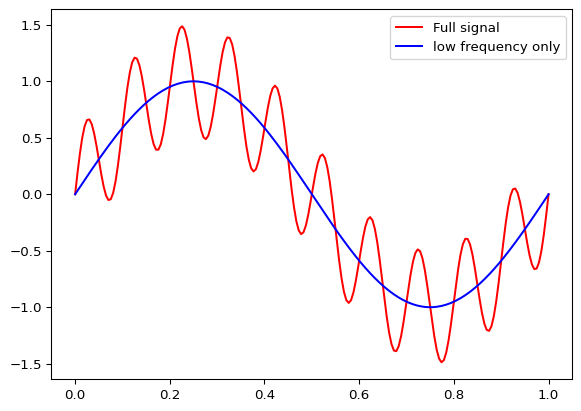

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 200
x = np.linspace(0, 1, N)
y = np.sin(2*np.pi*x) + 0.5*np.sin(20*np.pi*x)
yalone = np.sin(2*np.pi*x)

plt.plot(x, y, label='full signal', color='red')
plt.plot(x, yalone, label='low frequency only', color='blue')
plt.legend(['Full signal', 'low frequency only'])
plt.show()

## 

What’s the DFT of this signal?

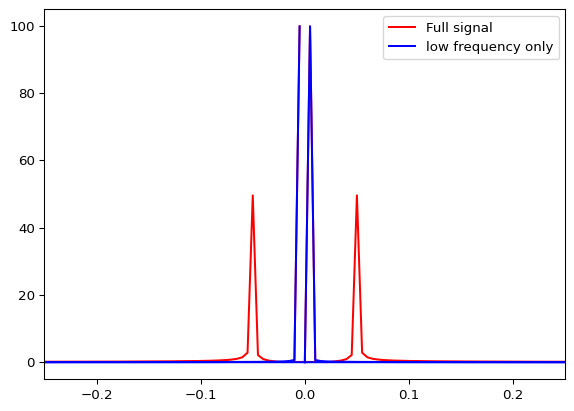

In [3]:
from scipy.fft import fft, fftshift
yf = fft(y)
yfalone = fft(yalone)
# make a non connected plot of yf

plt.plot(np.fft.fftfreq(200),np.abs(yf), color='red')
plt.plot(np.fft.fftfreq(200),np.abs(yfalone), color='blue')
plt.xlim(-0.25, 0.25)
plt.legend(['Full signal', 'low frequency only'])
plt.show()

## 

What’s with the double peaks?

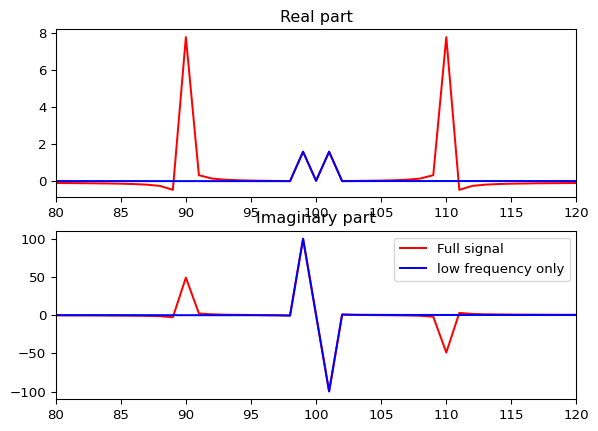

In [4]:
# make two subplots
ax1 = plt.subplot(2,1, 1)
ax2 = plt.subplot(2,1, 2)

ax1.plot(np.real(fftshift(yf)), color='red')
ax1.plot(np.real(fftshift(yfalone)),  color='blue')
ax1.set_xlim(80, 120)
ax1.set_title("Real part")
ax2.plot(np.imag(fftshift(yf)), color='red')
ax2.plot(np.imag(fftshift(yfalone)),  color='blue')
ax2.set_title("Imaginary part")

# set x-axis to be from -100 to 100
plt.xlim(80, 120)
plt.legend(['Full signal', 'low frequency only'])

display(Math(f’’))

## *Reconstruct the signal*

We can reconstruct the signal by taking the inverse DFT.

/Users/kendra/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part


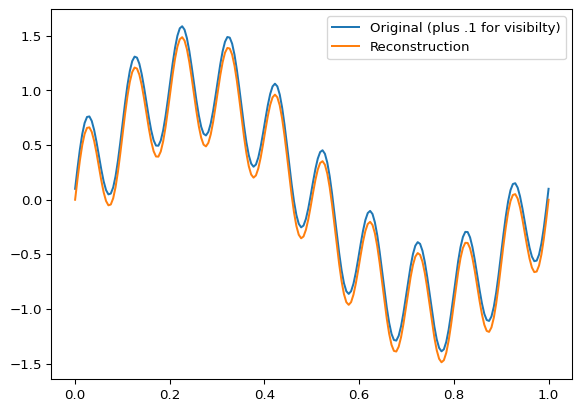

In [5]:
from scipy.fft import ifft

y_old = ifft(yf)

plt.plot(x, y+.1, label='Original (plus .1 for visibilty)')
plt.plot(x, y_old, label='Reconstruction')
plt.legend()
plt.show()

## 

Zero out the coefficient corresponding to the second sinusoid:

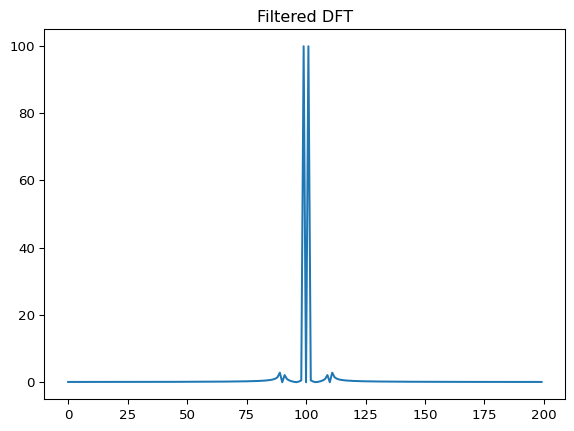

In [6]:
yf_new = yf.copy()
yf_new[190] = 0
yf_new[10] = 0
plt.plot(np.abs(fftshift(yf_new)))
plt.title('Filtered DFT')
plt.show()

## 

Compute the inverse DFT:

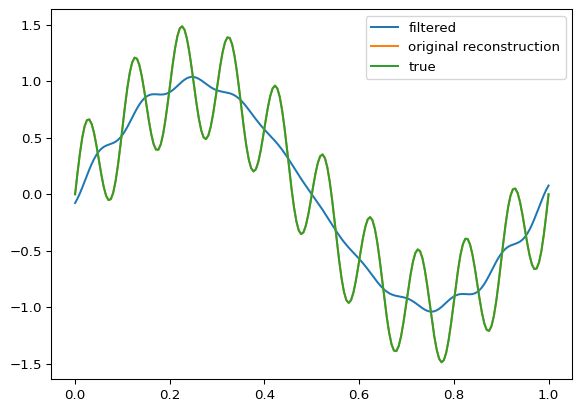

In [7]:
from scipy.fft import ifft

y_new = ifft(yf_new)
y_old = ifft(yf)

plt.plot(x, y_new, label='filtered')
plt.plot(x, y_old, label='original reconstruction')
plt.plot(x,y, label='true')
plt.legend()
plt.show()

## 

It’s pretty good!

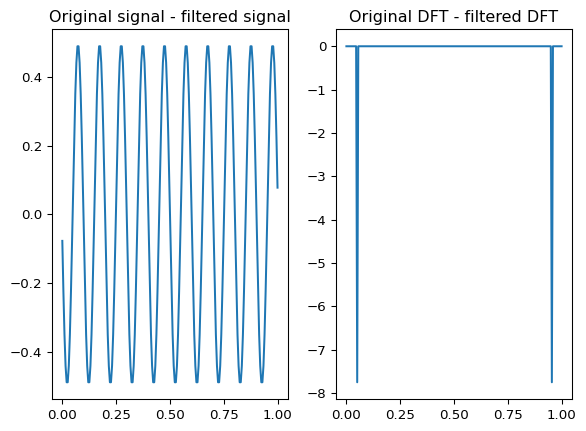

In [8]:
# find the ifft of the function with the zeroed out coefficients
change = ifft(yf_new-yf)

# make two subplots
ax1 = plt.subplot(1,2, 1)

ax1.plot(x, change)
ax1.set_title('Original signal - filtered signal')

ax2 = plt.subplot(1,2, 2)
ax2.plot(x,yf_new-yf)
ax2.set_title('Original DFT - filtered DFT')
plt.show()

## 

Try one more thing. Can we describe the change in the DFT as a
multiplicative vector? We sure can.

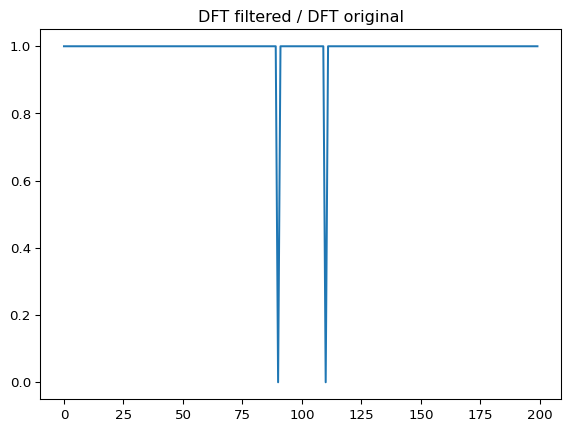

In [9]:
change = yf_new/yf
plt.plot(np.abs(fftshift(change)))
plt.title('DFT filtered / DFT original')
plt.show()

So we can describe the new DVD as the old DFT multiplied by a vector of
1s and 0s.

## 

The total process went like this:

1.  Take the DFT of the signal.
2.  Multiply the DFT by a vector of 1s and 0s to filter out the high
    frequency.
3.  Take the inverse DFT to get the filtered signal.

. . .

## *Filtering as convolution*

Suppose we have a signal and we’d like to try to filter out the high
frequencies, but we don’t know which ones they are.

We could try with a simple filter like $[1, 1, 1, 1, 1]/5$. This is a
simple moving average filter.

That means that we replace each point in the signal with the average of
the 5 points before it.

Mathematically, this is:

$$
f_{\text{filtered}}[n] = \sum_{m=0}^{4} f[n-m]/5
$$

OK. We note that this can also be written as a convolution, between the
signal and the vector $h = [1, 1, 1, 1, 1, 0, 0, 0, ...]/5$., where we
have padded the vector with zeros so that it is the same length as the
signal vector.

That is, $h_0 = 1/5$, $h_1 = 1/5$, $h_2 = 1/5$, $h_3 = 1/5$,
$h_4 = 1/5$, and $h_5 = 0$, all the way to $h_n=0$.

Then we can write this as:

$$
f_{\text{filtered}}[n] = \sum_{m=0}^{n} f[n-m] h[m]
$$

This operation is called **convolution**.

. . .

It’s messy to compute the convolution directly. But we can do it in the
Fourier domain…

## *The convolution theorem*

The convolution of two signals $f$ and $h$ is the inverse DFT of the
product of the DFTs of $f$ and $h$.

. . .

In other words, if $f = \text{ifft}(F)$ and $h = \text{ifft}(H)$, then
the convolution of $f$ and $h$ is $\text{ifft}(F \cdot H)$.

. . .

That’s much easier to calculate – only a dot product!

## *Proof*

(fill in if I have time)

## *Example*

Let’s take the signal from before,
$f(x) = \sin(2\pi x) + 0.5 \sin(20\pi x)$, and filter it with the moving
average filter $h = [1, 1, 1, 1, 1]/5$.

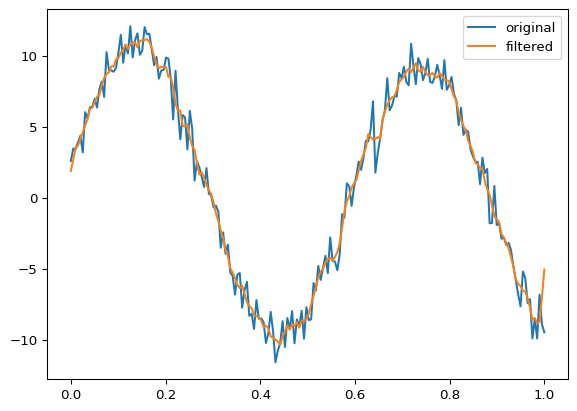

In [10]:
from scipy.signal import convolve
N = 200
x = np.linspace(0, 1, N)
y = np.sin(2*np.pi*x) + 10*np.sin(3.3*np.pi*x+.2)+ 10*np.random.normal(0, 0.1, N)
h = np.array([1, 1,1,1,1])/5
y_filtered = convolve(y, h, mode='same')
plt.plot(x, y, label='original')
plt.plot(x, y_filtered, label='filtered')
plt.legend()
plt.show()

## 

Now try it again using the convolution theorem.

Steps:

1.  Take the DFT of the signal.
2.  Pad the filter with zeros to make it the same length as the signal.
3.  Take the DFT of the filter.
4.  Multiply the two DFTs.
5.  Take the inverse DFT to get the filtered signal.
6.  Done!

. . .

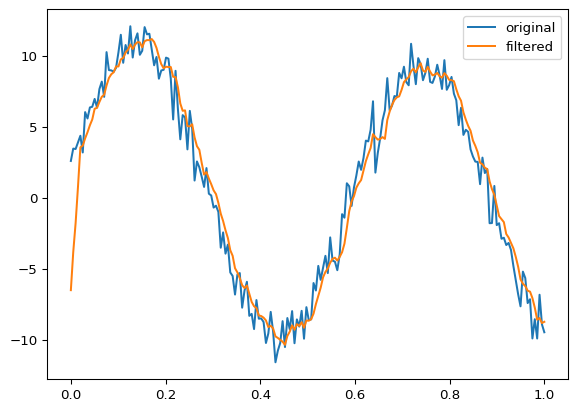

In [11]:
yf = fft(y)
hf = fft(h, N) # pad h with zeros
y_filtered = ifft(yf*hf)
plt.plot(x, y, label='original')
plt.plot(x, y_filtered, label='filtered')
plt.legend()
plt.show()

Then we can take the inverse DFT to get the filtered signal.

## *Convolution*

1.  Introduce the DFT per Strang with plot from Wiki page on DFT
2.  Introduce the idea of filtering as convolution –
    https://www.cs.uoi.gr/~cnikou/Courses/Digital_Image_Processing/
3.  Circular convolution
4.  Circular convolution as matrix multiplication by a circulant matrix
5.  Diagonalization of circulant matrices as the DFT
6.  Convolution theorem
7.  Example for a simple discrete filter
8.  Moving to continuous frequency per Shores